import fastai package

In [1]:
from fastbook import *
setup_book() 

/Users/jason/Desktop/vscode/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


import the package we would like to use in this project

In [2]:
from fastai.collab import *
from fastai.tabular.all import *
# path = Path('/Users/jason/Desktop/vscode/11.22/ml-1m')
path = Path('/Users/jason/Desktop/vscode/11.22')

check the path where my dataset located

In [3]:
print(path.absolute()) 
print(path.relative_to(Path.home()))  

/Users/jason/Desktop/vscode/11.22
Desktop/vscode/11.22


read the ratings table

In [6]:
ratings = pd.read_csv('ml-1m/ratings.dat', 
                     delimiter='::', 
                     header=None,
                     names=['user', 'movie', 'rating', 'timestamp'])

ratings.head()

/var/folders/10/14khtlc54k3ck9lk6hrdsjhm0000gn/T/ipykernel_66638/168166176.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('ml-1m/ratings.dat',


,user,movie,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


read the movies table

In [7]:
movies = pd.read_csv(path/'ml-1m/movies.dat',  delimiter='::', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

/var/folders/10/14khtlc54k3ck9lk6hrdsjhm0000gn/T/ipykernel_66638/3533363205.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv(path/'ml-1m/movies.dat',  delimiter='::', encoding='latin-1',


,movie,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


merge 2 in 1

In [8]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975)
1,1,661,3,978302109,James and the Giant Peach (1996)
2,1,914,3,978301968,My Fair Lady (1964)
3,1,3408,4,978300275,Erin Brockovich (2000)
4,1,2355,5,978824291,"Bug's Life, A (1998)"


make the dataloaders

In [9]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,user,title,rating
0,4979,Steel Magnolias (1989),2
1,5577,"Running Man, The (1987)",3
2,3032,Mr. Wonderful (1993),4
3,2595,Ghost Dog: The Way of the Samurai (1999),4
4,4181,Fools Rush In (1997),3
5,1017,Quatermass and the Pit (1967),3
6,5747,"Remains of the Day, The (1993)",4
7,4152,GoodFellas (1990),5
8,4245,Them! (1954),5
9,5608,High Fidelity (2000),4


check the x and y

In [10]:
dls.classes

{'user': ['#na#', np.int16(1), np.int16(2), np.int16(3), np.int16(4), np.int16(5), np.int16(6), np.int16(7), np.int16(8), np.int16(9), np.int16(10), np.int16(11), np.int16(12), np.int16(13), np.int16(14), np.int16(15), np.int16(16), np.int16(17), np.int16(18), np.int16(19), np.int16(20), np.int16(21), np.int16(22), np.int16(23), np.int16(24), np.int16(25), np.int16(26), np.int16(27), np.int16(28), np.int16(29), np.int16(30), np.int16(31), np.int16(32), np.int16(33), np.int16(34), np.int16(35), np.int16(36), np.int16(37), np.int16(38), np.int16(39), np.int16(40), np.int16(41), np.int16(42), np.int16(43), np.int16(44), np.int16(45), np.int16(46), np.int16(47), np.int16(48), np.int16(49), np.int16(50), np.int16(51), np.int16(52), np.int16(53), np.int16(54), np.int16(55), np.int16(56), np.int16(57), np.int16(58), np.int16(59), np.int16(60), np.int16(61), np.int16(62), np.int16(63), np.int16(64), np.int16(65), np.int16(66), np.int16(67), np.int16(68), np.int16(69), np.int16(70), np.int16(71

build up the collab learner by using fast ai api

In [ ]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

train 5 epoch and using the l2 norm

In [12]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.875276,0.916416,01:17
1,0.825240,0.887555,01:09
2,0.801822,0.839649,01:09
3,0.730977,0.792225,01:09
4,0.721492,0.774497,01:09


know details about the model 

In [19]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(6041, 50)
  (i_weight): Embedding(3707, 50)
  (u_bias): Embedding(6041, 1)
  (i_bias): Embedding(3707, 1)
)

save the first model (basic collab)

In [14]:
learn.save('basiclearner')

Path('models/basiclearner.pth')

load the first model

In [13]:
learn.load('basiclearner')

/Users/jason/Desktop/vscode/.venv/lib/python3.9/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=devic

In [14]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

['Sixth Sense, The (1999)',
 'Shawshank Redemption, The (1994)',
 "Schindler's List (1993)",
 'Raiders of the Lost Ark (1981)',
 'Star Wars: Episode IV - A New Hope (1977)']

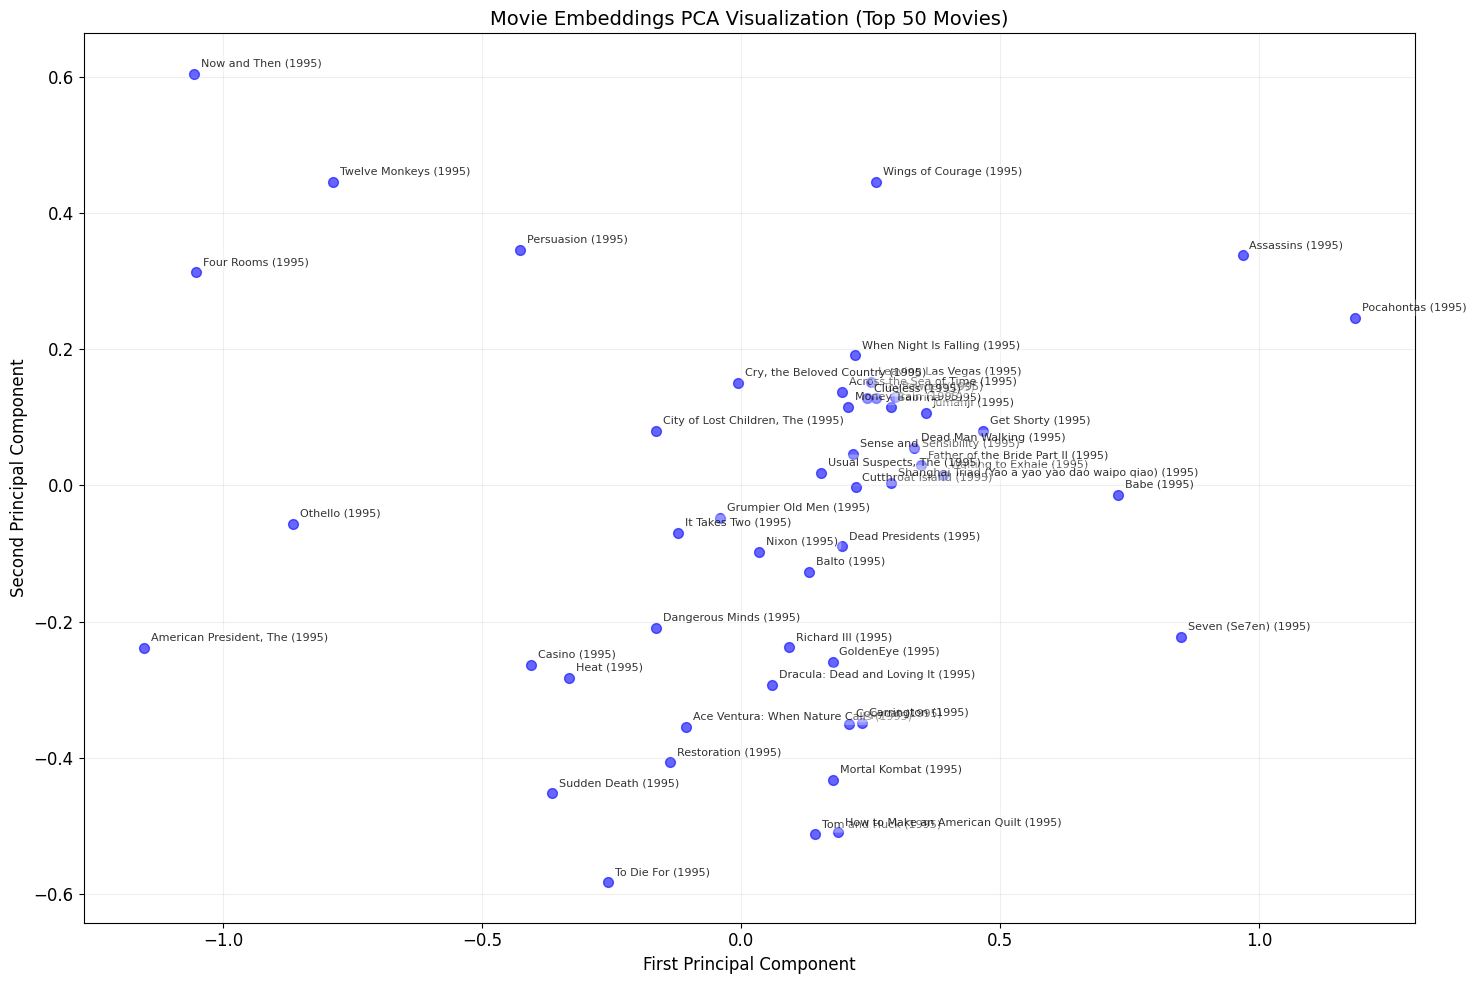

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA visualization with English labels
n_movies = 50  # Show top 50 movies

# Get movie embeddings
movie_factors = learn.model.i_weight.weight.data
movie_pca = PCA(n_components=2).fit_transform(movie_factors.cpu().numpy())

plt.figure(figsize=(15, 10))

# Plot the first n_movies points
plt.scatter(movie_pca[:n_movies, 0], movie_pca[:n_movies, 1], 
          alpha=0.6, s=50, c='blue')

# Add labels in English
for idx, (x, y) in enumerate(movie_pca[:n_movies]):
   title = movies.iloc[idx]['title']
   year = movies.iloc[idx]['year'] if 'year' in movies.columns else ''
   label = f"{title} ({year})" if year else title
   
   plt.annotate(label,
               (x, y),
               fontsize=8,
               alpha=0.8,
               xytext=(5, 5),
               textcoords='offset points',
               bbox=dict(
                   boxstyle='round,pad=0.3',
                   fc='white',
                   ec='none',
                   alpha=0.3
               ))

plt.title('Movie Embeddings PCA Visualization (Top 50 Movies)', fontsize=14)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# Optional: save the figure
plt.savefig('movie_embeddings_top50.png', dpi=300, bbox_inches='tight')

In [15]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Shawshank Redemption, The (1994)']
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Natural, The (1984)'

In [16]:
learnNN = collab_learner(dls, use_nn=True, y_range=(0, 5.5), layers=[200,100,50])

In [19]:
learnNN.model

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(6041, 210)
    (1): Embedding(3707, 160)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=370, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=50, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): LinBnDrop(
      (0): Linear(in_features=50, out_features=1, bias=True)
    )
    (4): fastai

In [20]:
learnNN.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.868968,0.894854,02:22
1,0.892386,0.891969,02:12
2,0.838640,0.858863,02:11
3,0.802674,0.814631,02:11
4,0.755326,0.784224,02:11


In [21]:
learnNN.save('NNlearner')

Path('models/NNlearner.pth')

In [17]:
learnNN.load('NNlearner')